In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_list = np.arange(4, 24, 1)
x_list = 2**x_list
print(x_list)

[     16      32      64     128     256     512    1024    2048    4096
    8192   16384   32768   65536  131072  262144  524288 1048576 2097152
 4194304 8388608]


In [3]:
os.system("gcc-10 -O3 -fno-tree-vectorize comp.c")

y_1 = []
for x in x_list:
    os.system("./a.out " + str(x) + " > out.txt")
    with open('out.txt') as f:
        lines = f.readlines()
        y_1.append(float(lines[2].split(None, 1)[0]))
        print(y_1[-1])
        f.close()
y_1 = np.array(y_1)
y_1 = 3*x_list / y_1

78.0
142.0
271.0
528.0
1044.0
2076.5
4370.0
9010.0
17702.5
35532.0
67663.0
138544.0
289736.0
581941.5
1142957.0
2353249.5
4793965.0
9107961.0
18332750.0
37329237.0


In [4]:
os.system("gcc-10 -O3 -fno-tree-vectorize comp_opt.c")

y_2 = []
for x in x_list:
    os.system("./a.out " + str(x) + " > out.txt")
    with open('out.txt') as f:
        lines = f.readlines()
        y_2.append(float(lines[2].split(None, 1)[0]))
        print(y_2[-1])
        f.close()
y_2 = np.array(y_2)
y_2 = 3*x_list / y_2

50.0
58.0
109.0
206.0
404.0
792.0
1568.5
3133.5
7183.5
14787.0
29644.5
61921.0
123525.5
249714.5
534333.0
1209629.5
2524711.5
5150394.0
11154330.0
24419916.0


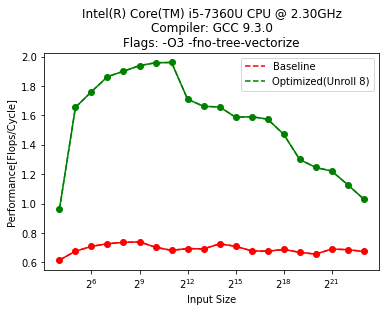

In [5]:
l1 = plt.plot(x_list, y_1, 'r--', label='Baseline')
l2 = plt.plot(x_list, y_2, 'g--', label='Optimized(Unroll 8)')
plt.xscale('log',base=2) 
plt.plot(x_list, y_1, 'ro-', x_list, y_2, 'go-')
plt.title('Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz\nCompiler: GCC 9.3.0\nFlags: -O3 -fno-tree-vectorize')
plt.xlabel('Input Size')
plt.ylabel('Performance[Flops/Cycle]')
plt.legend()
plt.show()